In [1]:
import tomotopy as tp
from gensim import corpora
from gensim.models import CoherenceModel
from tqdm import tqdm
import matplotlib.pyplot as plt
from nltk import tokenize
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from unidecode import unidecode


In [2]:
df = pd.read_csv('../datasets/fakeWhatsApp.BR_2022.csv')

In [3]:
len(df)

598971

In [3]:
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5
0,2022-10-10 18:20:24,9d737b3c9387855139bbad2311cc5709,0638569ee76dac58f59dcac20463c955,NaN,NaN,NaN,False,False,False,☝️\nHoje que eu fique sabendo do CANAL LULA FL...,5,2022-10-10 18:20:25.000937,-0.7003,0.843775,F7023FFB06C429A2C166922849A35ED8,558594228826.0:12@s.whatsapp.net,Texto,whatsapp,NaN,NaN
1,2022-10-10 22:02:58,1660a60f661754d2802ca53296e25be8,a5910d5cc1c830ade9eb4dd00f15ff6a,NaN,NaN,NaN,False,False,False,Mais pra que isso não aconteça nois temos quê ...,5,2022-10-10 22:02:58.4682,-0.2960,NaN,A9FAC78070C144890D181EF415B90CAD,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN
2,2022-10-11 00:39:31,c882172d447798d74915973ac83eba68,b84dfe2d1599b82768dcdecce7e6bb23,d2e0ec59ffd9f84764f5b147725d7196.oga,audio/ogg; codecs=opus,NaN,True,False,False,NaN,5,2022-10-11 00:39:33.445125,NaN,NaN,737948BE86D450A426470794F91BC80D,558594228826.0:12@s.whatsapp.net,Audio,whatsapp,NaN,d2e0ec59ffd9f84764f5b147725d7196
3,2022-10-10 23:36:19,91e3c22c08b24ba01ac4524d77bcb1da,addb88a34374d43aa9ecd4df7359ce39,NaN,NaN,NaN,False,False,False,‎Acesse este link para entrar no meu grupo do ...,5,2022-10-10 23:36:19.724987,-0.1531,NaN,439A91ADD8F355CD23C4BB107A5E88BB,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN
4,2022-10-10 23:40:12,77c1a8a31fee269db258a028a61f0b88,a5831b109d4d95fae8ee0ce464e48a6a,bb80cd530332bb6b95c34e719992d249.f4v,video/mp4,NaN,True,False,False,NaN,5,2022-10-10 23:40:14.397495,NaN,NaN,092203A082AC3DFB2A4933F60453AEB8,558594228826.0:12@s.whatsapp.net,Video,whatsapp,NaN,bb80cd530332bb6b95c34e719992d249


In [4]:
ids_para_remover = ['6ef561ec0f448afcd7b3751124bb0712','d3e678a0ba0e1485548260a7c4599152',
                    'ac5703154484de05336af617455ca55e','a39edbd64d378226ffa60433649a0acf',
                    'c66d0d4ae5a4b281bff67e1fa4fbd6ba','819bbc872ed6d81f44d746b710eecf06',
                    'ec94da4d54f9a5693e88fa582926be53','6a38c72316d87c028dfd66c10442476b',
                    '94099e1e46f129856541e2b3640896d1','8f367d1693fff47218603fa47ded525c',
                    'c09caffee0d1bd30926dea9df25dc88f']

In [5]:
# Filtrar o DataFrame para remover as linhas com esses IDs
df_filtrado = df[~df['id_member_anonymous'].isin(ids_para_remover)]
df_filtrado

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5
0,2022-10-10 18:20:24,9d737b3c9387855139bbad2311cc5709,0638569ee76dac58f59dcac20463c955,NaN,NaN,NaN,False,False,False,☝️\nHoje que eu fique sabendo do CANAL LULA FL...,5,2022-10-10 18:20:25.000937,-0.7003,0.843775,F7023FFB06C429A2C166922849A35ED8,558594228826.0:12@s.whatsapp.net,Texto,whatsapp,NaN,NaN
1,2022-10-10 22:02:58,1660a60f661754d2802ca53296e25be8,a5910d5cc1c830ade9eb4dd00f15ff6a,NaN,NaN,NaN,False,False,False,Mais pra que isso não aconteça nois temos quê ...,5,2022-10-10 22:02:58.4682,-0.2960,NaN,A9FAC78070C144890D181EF415B90CAD,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN
2,2022-10-11 00:39:31,c882172d447798d74915973ac83eba68,b84dfe2d1599b82768dcdecce7e6bb23,d2e0ec59ffd9f84764f5b147725d7196.oga,audio/ogg; codecs=opus,NaN,True,False,False,NaN,5,2022-10-11 00:39:33.445125,NaN,NaN,737948BE86D450A426470794F91BC80D,558594228826.0:12@s.whatsapp.net,Audio,whatsapp,NaN,d2e0ec59ffd9f84764f5b147725d7196
3,2022-10-10 23:36:19,91e3c22c08b24ba01ac4524d77bcb1da,addb88a34374d43aa9ecd4df7359ce39,NaN,NaN,NaN,False,False,False,‎Acesse este link para entrar no meu grupo do ...,5,2022-10-10 23:36:19.724987,-0.1531,NaN,439A91ADD8F355CD23C4BB107A5E88BB,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN
4,2022-10-10 23:40:12,77c1a8a31fee269db258a028a61f0b88,a5831b109d4d95fae8ee0ce464e48a6a,bb80cd530332bb6b95c34e719992d249.f4v,video/mp4,NaN,True,False,False,NaN,5,2022-10-10 23:40:14.397495,NaN,NaN,092203A082AC3DFB2A4933F60453AEB8,558594228826.0:12@s.whatsapp.net,Video,whatsapp,NaN,bb80cd530332bb6b95c34e719992d249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598966,2022-11-13 00:46:56,b1b419f54664f6cd4fcdb40425862d36,b1b419f54664f6cd4fcdb40425862d36,7719ba57cbe74eb5c8059d6b1a14d1ca.f4v,video/mp4,NaN,True,False,False,NaN,5,2023-01-30 18:20:22.262572,NaN,NaN,08E682716448AB06DEE126A30E7AAA77,558594228826.0:17@s.whatsapp.net,Video,whatsapp,NaN,7719ba57cbe74eb5c8059d6b1a14d1ca
598967,2022-11-13 13:37:03,2ad743e9ff831a75911a983b42205845,64c9a7c8ac338faa258e5aea9a1c2ae3,c6d59f0b86e63dbcce7fc682a1eaea50.f4v,video/mp4,NaN,True,False,False,NaN,5,2023-01-30 18:20:22.269632,NaN,NaN,3EB0259ED9B8FACF18A9,558594228826.0:17@s.whatsapp.net,Video,whatsapp,NaN,c6d59f0b86e63dbcce7fc682a1eaea50
598968,2022-11-13 17:43:22,b1b419f54664f6cd4fcdb40425862d36,b1b419f54664f6cd4fcdb40425862d36,003ace942d9665adc9647df9d9526c0c.jpeg,image/jpeg,NaN,True,False,False,NaN,5,2023-01-30 18:20:22.277283,NaN,NaN,5CD9F23CD07BEE38693E68E11F9C6A55,558594228826.0:17@s.whatsapp.net,Imagem,whatsapp,NaN,003ace942d9665adc9647df9d9526c0c
598969,2022-11-13 21:40:47,b1b419f54664f6cd4fcdb40425862d36,b1b419f54664f6cd4fcdb40425862d36,bab5653a94b097404739a061dbbc7407.f4v,video/mp4,NaN,True,False,False,NaN,5,2023-01-30 18:20:22.284021,NaN,NaN,D3BDE4A5C68E7148C0925F6C582C99A9,558594228826.0:17@s.whatsapp.net,Video,whatsapp,NaN,bab5653a94b097404739a061dbbc7407


In [6]:
# Removendo linhas com valores NaN na coluna 'text_content_anonymous'
df_filtrado = df_filtrado.dropna(subset=['text_content_anonymous'])

# Removendo trava_zap
df_filtrado = df_filtrado[df_filtrado['trava_zap'] == False]



#df_filtrado = df_filtrado[0:100]
len(df_filtrado)

254480

In [7]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):

    # Função para extrair e substituir o domínio da URL
    def substituir_dominios(texto):
        # Função para extrair e substituir o domínio da URL
        def extrair_dominio(url):
            # Remove o protocolo (http://, https://, etc.) e o "www." se presente
            dominio = re.sub(r'^https?://(?:www\.)?|www\.', '', url)
            # Remove o caminho e parâmetros da URL
            dominio = re.split(r'[/?#]', dominio)[0]
            # Retorna a parte principal do domínio (antes do primeiro ponto)
            return dominio.split('.')[0]

        # Substitui URLs por seus domínios principais
        return re.sub(r'https?://(?:www\.)?\S+|www\.\S+', lambda match: extrair_dominio(match.group(0)), texto)

    # Substituir domínios
    text = substituir_dominios(text)

    # Converte para minúsculas
    text = text.lower()

    # Remove acentos
    text = unidecode(text)

    #Remover Pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove URLs e menções
    #text = re.sub(r'http\S+|www\S+|https\S+|@\w+', '', text)

    # Substitui emojis repetidos por apenas um
    text = re.sub(r'([\U00010000-\U0010FFFF])\1+', r'\1', text)
    text = re.sub(r'([\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF])\1+', r'\1', text)


    # Remove espaços em branco extras (início ou final) e múltiplos espaços no meio do texto
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove pontuações e caracteres especiais
    #text = re.sub(r'[^\w\s]', '', text)

    # Ajusta risadas "kkk" ou mais para "kk"
    text = re.sub(r'k{2,}|K{2,}', 'kk', text)

    # Ajusta risadas "haha" ou mais para "haha"
    text = re.sub(r'(ha){2,}', 'haha', text, flags=re.IGNORECASE)

    # Ajusta risadas "kaka" ou mais para "kaka"
    text = re.sub(r'(ka){2,}', 'kaka', text, flags=re.IGNORECASE)

    # Remove as stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text


[nltk_data] Downloading package punkt to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:

df_geral = df_filtrado.copy()

# Aplicar o pré-processamento à coluna de texto
df_geral['text_processed'] = df_geral['text_content_anonymous'].apply(preprocess_text)
df_geral.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,text_processed
0,2022-10-10 18:20:24,9d737b3c9387855139bbad2311cc5709,0638569ee76dac58f59dcac20463c955,NaN,NaN,NaN,False,False,False,☝️\nHoje que eu fique sabendo do CANAL LULA FL...,...,2022-10-10 18:20:25.000937,-0.7003,0.843775,F7023FFB06C429A2C166922849A35ED8,558594228826.0:12@s.whatsapp.net,Texto,whatsapp,NaN,NaN,hoje fique sabendo canal lula flix vi pt entro...
1,2022-10-10 22:02:58,1660a60f661754d2802ca53296e25be8,a5910d5cc1c830ade9eb4dd00f15ff6a,NaN,NaN,NaN,False,False,False,Mais pra que isso não aconteça nois temos quê ...,...,2022-10-10 22:02:58.4682,-0.2960,NaN,A9FAC78070C144890D181EF415B90CAD,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,pra nao aconteca nois fazer anossa parte
3,2022-10-10 23:36:19,91e3c22c08b24ba01ac4524d77bcb1da,addb88a34374d43aa9ecd4df7359ce39,NaN,NaN,NaN,False,False,False,‎Acesse este link para entrar no meu grupo do ...,...,2022-10-10 23:36:19.724987,-0.1531,NaN,439A91ADD8F355CD23C4BB107A5E88BB,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,acesse link entrar grupo whatsapp chat
7,2022-10-10 16:49:48,325720ed3339a91b8076df12c1e95c45,0e345813dcb62b0fe4d8537f311af0f1,NaN,NaN,https://m.kwai.com/photo/150000006567403/52240...,False,True,False,Fortes palavras da Pastora Damares!\nhttps://k...,...,2022-10-10 16:49:50.051126,0.0000,NaN,F18BADED5AFA8FB0C33FE36625872DB8,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,fortes palavras pastora damares kwaivideo
8,2022-10-10 16:49:53,8ed44a70a011285622e2b8919c2c8c3e,3b3e64e81c3e3f3bfc5ba76ddb90fb2d,0d6f2896e5941ef1933e69bbd7a32f69.jpeg,image/jpeg,NaN,True,False,False,🤣🤣🤣🤣🤣🤣🤣🤣,...,2022-10-10 16:49:54.713831,0.0000,NaN,724C233591C3A62A5231B47FF22ADE4B,558594228826.0:12@s.whatsapp.net,Imagem,whatsapp,NaN,0d6f2896e5941ef1933e69bbd7a32f69,


### Calculando a diversidade dos tópicos
A diversidade de tópicos mede quantas palavras únicas existem entre os top-N termos de todos os tópicos. 

In [8]:
def topic_diversity(model, top_n=10):
    topic_words = []
    for k in range(model.k):  
        words = [word for word, _ in model.get_topic_words(k, top_n=top_n)]  
        topic_words.extend(words)
    unique_words = set(topic_words)
    return len(unique_words) / (top_n * model.k)


### IRBO 

IRBO avalia quanto os tópicos são distintos entre si, usando o Rank-Biased Overlap (RBO) invertido. Quanto maior o IRBO, mais diferentes são os tópicos

In [9]:
import rbo

def compute_irbo_ptm(model, top_n=10):
    topics = []
    for k in range(model.k):
        topic_terms = [word for word, _ in model.get_topic_words(k, top_n=top_n)]
        topics.append(topic_terms)

    n = len(topics)
    total_irbo = 0
    count = 0

    for i in range(n):
        for j in range(i + 1, n):
            rbo_score = rbo.RankingSimilarity(topics[i], topics[j]).rbo()
            total_irbo += (1 - rbo_score)  # IRBO = 1 - RBO
            count += 1

    return total_irbo / count if count > 0 else 0


In [10]:
# Processamento
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

In [11]:
def compute_coherence_ptm(texts, id2word, coherence, start=2, limit=30, step=2):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Treinando PTModel ({coherence})"):
        model = tp.PTModel(k=num_topics, seed=42)
        for doc in texts:
            model.add_doc(doc)
        model.train(100)
        model_list.append(model)

        # Coherence do gensim precisa de tópicos no formato: lista de listas de palavras
        topics = []
        for k in range(model.k):
            topic_words = [word for word, _ in model.get_topic_words(k, top_n=10)]
            topics.append(topic_words)

        coh_model = CoherenceModel(topics=topics, texts=texts, dictionary=id2word, coherence=coherence)
        coherence_score = coh_model.get_coherence()
        coherence_values.append(coherence_score)

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]

    return optimal_num_topics, model_list, coherence_values


In [12]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto]


## Modelando os Tópicos sem filtro 

In [13]:
texto_processado = df_geral['text_processed'].apply(processar_texto)

# Corpus e Dicionário (para CoherenceModel do gensim)
id2word = corpora.Dictionary(texto_processado)
corpus = [id2word.doc2bow(text) for text in texto_processado]
texts = texto_processado.tolist()

In [14]:
def calculate_ptm_coherence_for_metrics(texts, id2word, metrics, start=2, limit=30, step=2):
    results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_ptm(
            texts=texts,
            id2word=id2word,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

ptm_coherence_results = calculate_ptm_coherence_for_metrics(
    texts=texto_processado.tolist(),
    id2word=id2word,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)


Treinando PTModel (c_v):   0%|          | 0/14 [00:00<?, ?it/s]

C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_32684\2436467606.py:10: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(100)
Treinando PTModel (c_npmi): 100%|██████████| 14/14 [44:09<00:00, 189.28s/it]


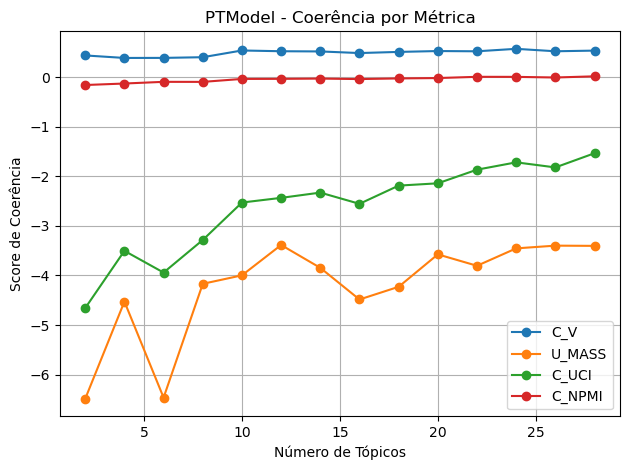


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.4404
Qtd. tópicos = 4 -> Coerência = 0.3899
Qtd. tópicos = 6 -> Coerência = 0.3909
Qtd. tópicos = 8 -> Coerência = 0.4047
Qtd. tópicos = 10 -> Coerência = 0.5405
Qtd. tópicos = 12 -> Coerência = 0.5253
Qtd. tópicos = 14 -> Coerência = 0.5212
Qtd. tópicos = 16 -> Coerência = 0.4887
Qtd. tópicos = 18 -> Coerência = 0.5117
Qtd. tópicos = 20 -> Coerência = 0.5292
Qtd. tópicos = 22 -> Coerência = 0.5241
Qtd. tópicos = 24 -> Coerência = 0.5739
Qtd. tópicos = 26 -> Coerência = 0.5245
Qtd. tópicos = 28 -> Coerência = 0.538
Melhor número de tópicos segundo C_V: 24

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -6.4868
Qtd. tópicos = 4 -> Coerência = -4.5262
Qtd. tópicos = 6 -> Coerência = -6.4647
Qtd. tópicos = 8 -> Coerência = -4.168
Qtd. tópicos = 10 -> Coerência = -3.9968
Qtd. tópicos = 12 -> Coerência = -3.3845
Qtd. tópicos = 14 -> Coerência = -3.8457
Qtd. tópicos = 16 -> Coerência = -4.4844
Qtd. tóp

In [15]:
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = ptm_coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("PTModel - Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), ptm_coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {ptm_coherence_results[metric]['num_topics']}")


In [35]:
# Escolha da métrica
chosen_metric = 'c_npmi'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_c_npmi.csv', index=False)
df_topicos.head(10)

,Tópico,Palavras,Pesos
0,0,"nao, bolsonaro, brasil, vai, bandeira, voto, d...","[0.03186195716261864, 0.019670408219099045, 0...."
1,1,"r, 00, brasil, 1, 000, reais, 2, mil, 3, vai","[0.018361156806349754, 0.0148715665563941, 0.0..."
2,2,"bolsonaro, 22, pl, t, voto, deputado, presiden...","[0.03824157640337944, 0.03344479948282242, 0.0..."
3,3,"pt, nao, blogspot, divirtace, pag, item, todos...","[0.011020847596228123, 0.010390549898147583, 0..."
4,4,"fazendo, olha, gente, tao, covardia, pronuncie...","[0.0783952847123146, 0.07767971605062485, 0.07..."
5,5,"joao, saymon, homessexual, mestre, tic, tac, 9...","[0.3249436020851135, 0.28511425852775574, 0.28..."
6,6,"13, pra, rua, chegar, onibus, bolsonaro, brasi...","[0.4919428527355194, 0.07902409881353378, 0.07..."
7,7,"janja, robo, deus, pereira, sao, bombeiro, pro...","[0.43125665187835693, 0.42603185772895813, 0.0..."
8,8,"phone, 55, 20, 1, 91, 92, 127, 155, 111, 115","[0.22079117596149445, 0.17247040569782257, 0.0..."
9,9,"r, milhoes, escandalo, caso, pt, 2018, 2016, d...","[0.04116005077958107, 0.029888814315199852, 0...."


In [29]:
div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")


Diversidade de Tópicos: 0.7107
IRBO médio entre tópicos: 0.958


In [36]:
# Escolha da métrica
chosen_metric = 'c_v'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_c_v.csv', index=False)
df_topicos.head(10)

,Tópico,Palavras,Pesos
0,0,"9999999, bocahomens, cagando, bosta, carae, vo...","[0.9512278437614441, 0.0046555050648748875, 0...."
1,1,"r, dia, anos, habitantes, g1, 5, votaram, 6, v...","[0.023305729031562805, 0.01000175066292286, 0...."
2,2,"nao, brasil, porque, sao, governo, esquerda, p...","[0.010895469225943089, 0.010502326302230358, 0..."
3,3,"br, 2022, portaltocanews, sobre, www, dia, blo...","[0.013108265586197376, 0.007050744257867336, 0..."
4,4,"22222222, 11111111, 77777777, phidutheueaanguu...","[0.51585853099823, 0.2178288698196411, 0.16195..."
5,5,"lula, dizer, proibido, tse, pt, stf, sobre, fa...","[0.1450948715209961, 0.03413346782326698, 0.03..."
6,6,"be, youtu, www, instagram, brasil, facebook, f...","[0.07751171290874481, 0.0774446576833725, 0.06..."
7,7,"pl, deputado, bolsonaro, federal, senador, 22,...","[0.030727514997124672, 0.019501812756061554, 0..."
8,8,"bocahomens, cagando, bosta, carae, vomitando, ...","[0.13690246641635895, 0.10309872776269913, 0.0..."
9,9,"joao, saymon, homessexual, revolta, nao, voce,...","[0.07319675385951996, 0.06435955315828323, 0.0..."


In [31]:
div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")


Diversidade de Tópicos: 0.675
IRBO médio entre tópicos: 0.9526


In [16]:
# Escolha da métrica
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_c_uci.csv', index=False)
df_topicos.head(10)

,Tópico,Palavras,Pesos
0,0,"nao, bolsonaro, brasil, vai, bandeira, voto, d...","[0.03186195716261864, 0.019670408219099045, 0...."
1,1,"r, 00, brasil, 1, 000, reais, 2, mil, 3, vai","[0.018361156806349754, 0.0148715665563941, 0.0..."
2,2,"bolsonaro, 22, pl, t, voto, deputado, presiden...","[0.03824157640337944, 0.03344479948282242, 0.0..."
3,3,"pt, nao, blogspot, divirtace, pag, item, todos...","[0.011020847596228123, 0.010390549898147583, 0..."
4,4,"fazendo, olha, gente, tao, covardia, pronuncie...","[0.0783952847123146, 0.07767971605062485, 0.07..."
5,5,"joao, saymon, homessexual, mestre, tic, tac, 9...","[0.3249436020851135, 0.28511425852775574, 0.28..."
6,6,"13, pra, rua, chegar, onibus, bolsonaro, brasi...","[0.4919428527355194, 0.07902409881353378, 0.07..."
7,7,"janja, robo, deus, pereira, sao, bombeiro, pro...","[0.43125665187835693, 0.42603185772895813, 0.0..."
8,8,"phone, 55, 20, 1, 91, 92, 127, 155, 111, 115","[0.22079117596149445, 0.17247040569782257, 0.0..."
9,9,"r, milhoes, escandalo, caso, pt, 2018, 2016, d...","[0.04116005077958107, 0.029888814315199852, 0...."


In [17]:
div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")


Diversidade de Tópicos: 0.7107
IRBO médio entre tópicos: 0.958


In [41]:
# Escolha da métrica
chosen_metric = 'u_mass'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_u_mass.csv', index=False)
df_topicos.head(10)

,Tópico,Palavras,Pesos
0,0,"joao, saymon, homessexual, gente, olha, tao, f...","[0.038893211632966995, 0.03324638679623604, 0...."
1,1,"br, brasil, r, voce, anos, dia, sim, 5, sao, g...","[0.011415074579417706, 0.008373264223337173, 0..."
2,2,"bolsonaro, 22, pl, lula, r, voto, federal, dep...","[0.027796003967523575, 0.02033202536404133, 0...."
3,3,"nao, voce, vai, 13, reais, grupo, r, 000, pix,...","[0.018976381048560143, 0.008612604811787605, 0..."
4,4,"lula, pra, janja, robo, nao, rua, porque, bras...","[0.04394540190696716, 0.019579418003559113, 0...."
5,5,"bocahomens, cagando, bosta, carae, vomitando, ...","[0.14261911809444427, 0.1079995185136795, 0.08..."
6,6,"13, nao, lula, bolsonaro, dizer, proibido, int...","[0.059066224843263626, 0.029657289385795593, 0..."
7,7,"nao, br, whatsapp, www, deus, bolsonaro, voce,...","[0.01866263709962368, 0.015030902810394764, 0...."
8,8,"9999999, 22222222, 11111111, 77777777, phiduth...","[0.6703009009361267, 0.16718436777591705, 0.07..."
9,9,"nao, be, youtu, www, brasil, bolsonaro, vamos,...","[0.027500616386532784, 0.020917069166898727, 0..."


In [42]:
div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")


Diversidade de Tópicos: 0.7333
IRBO médio entre tópicos: 0.9387


## Modelagem de tópicos com filtro religioso

In [43]:
palavras_religiosas = [
    "deus", "jesus", "misericordia", "davi",
    "salomao", "reino", "templo", "conservador",
    "pentecostal", "rcc", "renovacao", "carismatic",
    "paulo ricardo", "bernardo kuster", "herege", "ateu",
    "jerico", "heresia"
]


In [44]:
# Função para verificar se uma palavra está relacionada à religião
def relacionada_religiao(word):
    word_lower = word.lower()
    palavras_religiosas_lower = [palavra.lower() for palavra in palavras_religiosas]

    # Verificando se alguma palavra da lista de palavras religiosas está presente
    return any(palavra in word_lower for palavra in palavras_religiosas_lower)


df_religiao = df_geral[df_geral['text_processed'].apply(lambda x: relacionada_religiao(x))]



In [ ]:
texto_processado_religiao = df_religiao['text_processed'].apply(processar_texto)

In [47]:
# Corpus e Dicionário (para CoherenceModel do gensim)
id2word_religiao = corpora.Dictionary(texto_processado_religiao)
corpus_religiao = [id2word.doc2bow(text) for text in texto_processado_religiao]
texts_religiao = texto_processado_religiao.tolist()

In [50]:
def calculate_ptm_coherence_for_metrics(texts_religiao, id2word_religiao, metrics, start=2, limit=30, step=2):
    results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_ptm(
            texts=texts_religiao,
            id2word=id2word_religiao,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

ptm_coherence_results = calculate_ptm_coherence_for_metrics(
    texts_religiao=texto_processado_religiao.tolist(),
    id2word_religiao=id2word_religiao,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)


Treinando PTModel (c_v):   0%|          | 0/14 [00:00<?, ?it/s]C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_19732\2436467606.py:10: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(100)
Treinando PTModel (c_npmi): 100%|██████████| 14/14 [10:39<00:00, 45.65s/it]


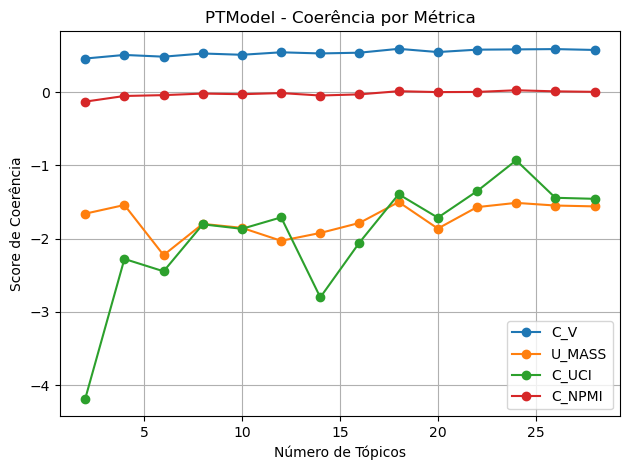


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.46
Qtd. tópicos = 4 -> Coerência = 0.5091
Qtd. tópicos = 6 -> Coerência = 0.4853
Qtd. tópicos = 8 -> Coerência = 0.5289
Qtd. tópicos = 10 -> Coerência = 0.5112
Qtd. tópicos = 12 -> Coerência = 0.5453
Qtd. tópicos = 14 -> Coerência = 0.5296
Qtd. tópicos = 16 -> Coerência = 0.5398
Qtd. tópicos = 18 -> Coerência = 0.5926
Qtd. tópicos = 20 -> Coerência = 0.5484
Qtd. tópicos = 22 -> Coerência = 0.5812
Qtd. tópicos = 24 -> Coerência = 0.5847
Qtd. tópicos = 26 -> Coerência = 0.589
Qtd. tópicos = 28 -> Coerência = 0.5772
Melhor número de tópicos segundo C_V: 18

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -1.6586
Qtd. tópicos = 4 -> Coerência = -1.5403
Qtd. tópicos = 6 -> Coerência = -2.2246
Qtd. tópicos = 8 -> Coerência = -1.7983
Qtd. tópicos = 10 -> Coerência = -1.8521
Qtd. tópicos = 12 -> Coerência = -2.0291
Qtd. tópicos = 14 -> Coerência = -1.9222
Qtd. tópicos = 16 -> Coerência = -1.785
Qtd. tópic

In [52]:
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = ptm_coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("PTModel - Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), ptm_coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {ptm_coherence_results[metric]['num_topics']}")


In [53]:
# Escolha da métrica
chosen_metric = 'c_npmi'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_religioso_c_npmi.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.6667
IRBO médio entre tópicos: 0.9413


,Tópico,Palavras,Pesos
0,0,"turno, bolsonaro, brasil, presidente, todos, c...","[0.030319292098283768, 0.02243352308869362, 0...."
1,1,"phone, 55, 20, 1, 91, 92, 127, 155, 128, 111","[0.24295909702777863, 0.1141616702079773, 0.07..."
2,2,"porque, entenderam, nao, esquerda, militar, an...","[0.04009659215807915, 0.0364493690431118, 0.01..."
3,3,"nao, voce, oracao, tambem, pois, 1, sim, vai, ...","[0.04309246689081192, 0.01359841600060463, 0.0..."
4,4,"eleicoes, lula, urnas, sr, 00, alexandre, nao,...","[0.016134321689605713, 0.013457913883030415, 0..."
5,5,"55, phone, grupos, souza, silva, grupo, gilson...","[0.24683316051959991, 0.18240639567375183, 0.0..."
6,6,"lula, be, youtu, brasil, diz, pt, defende, deu...","[0.08026772737503052, 0.05697683244943619, 0.0..."
7,7,"nao, todos, direito, brasileiros, manifestacao...","[0.07456554472446442, 0.01305342186242342, 0.0..."
8,8,"nao, bolsonaro, vai, brasil, dizer, agora, tud...","[0.034898847341537476, 0.03222673386335373, 0...."
9,9,"sao, federal, whatsapp, pais, nacional, nao, p...","[0.014127623289823532, 0.01193374115973711, 0...."


In [54]:
# Escolha da métrica
chosen_metric = 'c_v'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_religioso_c_v.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.7
IRBO médio entre tópicos: 0.9253


,Tópico,Palavras,Pesos
0,0,"porque, nao, entenderam, agora, esquerda, anos...","[0.03330417349934578, 0.019039999693632126, 0...."
1,1,"phone, 55, 20, 1, 91, 92, 127, 155, 111, 128","[0.24288436770439148, 0.11413682252168655, 0.0..."
2,2,"brasil, fez, ferrovia, deu, br, 00, coisas, br...","[0.020737720653414726, 0.018374891951680183, 0..."
3,3,"55, phone, grupos, souza, gilson, silva, grupo...","[0.24661454558372498, 0.1825544387102127, 0.00..."
4,4,"bolsonaro, lula, eleicoes, urnas, brasil, 00, ...","[0.0151362931355834, 0.01496273372322321, 0.01..."
5,5,"nao, brasil, bolsonaro, vai, acima, agora, tud...","[0.03894883394241333, 0.026505472138524055, 0...."
6,6,"pl, deputado, governador, senador, federal, ar...","[0.0641402006149292, 0.022624434903264046, 0.0..."
7,7,"nao, voce, direito, ja, todos, pode, bolsonaro...","[0.056820668280124664, 0.013111604377627373, 0..."
8,8,"dia, r, sao, 5, anos, 0, apos, contra, noticia...","[0.01522777322679758, 0.012075304985046387, 0...."
9,9,"lula, youtu, be, brasil, pt, diz, vai, defende...","[0.123603455722332, 0.07709374278783798, 0.077..."


In [55]:
# Escolha da métrica
chosen_metric = 'u_mass'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_religioso_u_mass.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.7
IRBO médio entre tópicos: 0.9253


,Tópico,Palavras,Pesos
0,0,"porque, nao, entenderam, agora, esquerda, anos...","[0.03330417349934578, 0.019039999693632126, 0...."
1,1,"phone, 55, 20, 1, 91, 92, 127, 155, 111, 128","[0.24288436770439148, 0.11413682252168655, 0.0..."
2,2,"brasil, fez, ferrovia, deu, br, 00, coisas, br...","[0.020737720653414726, 0.018374891951680183, 0..."
3,3,"55, phone, grupos, souza, gilson, silva, grupo...","[0.24661454558372498, 0.1825544387102127, 0.00..."
4,4,"bolsonaro, lula, eleicoes, urnas, brasil, 00, ...","[0.0151362931355834, 0.01496273372322321, 0.01..."
5,5,"nao, brasil, bolsonaro, vai, acima, agora, tud...","[0.03894883394241333, 0.026505472138524055, 0...."
6,6,"pl, deputado, governador, senador, federal, ar...","[0.0641402006149292, 0.022624434903264046, 0.0..."
7,7,"nao, voce, direito, ja, todos, pode, bolsonaro...","[0.056820668280124664, 0.013111604377627373, 0..."
8,8,"dia, r, sao, 5, anos, 0, apos, contra, noticia...","[0.01522777322679758, 0.012075304985046387, 0...."
9,9,"lula, youtu, be, brasil, pt, diz, vai, defende...","[0.123603455722332, 0.07709374278783798, 0.077..."


In [56]:
# Escolha da métrica
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_religioso_c_uci.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.6667
IRBO médio entre tópicos: 0.9413


,Tópico,Palavras,Pesos
0,0,"turno, bolsonaro, brasil, presidente, todos, c...","[0.030319292098283768, 0.02243352308869362, 0...."
1,1,"phone, 55, 20, 1, 91, 92, 127, 155, 128, 111","[0.24295909702777863, 0.1141616702079773, 0.07..."
2,2,"porque, entenderam, nao, esquerda, militar, an...","[0.04009659215807915, 0.0364493690431118, 0.01..."
3,3,"nao, voce, oracao, tambem, pois, 1, sim, vai, ...","[0.04309246689081192, 0.01359841600060463, 0.0..."
4,4,"eleicoes, lula, urnas, sr, 00, alexandre, nao,...","[0.016134321689605713, 0.013457913883030415, 0..."
5,5,"55, phone, grupos, souza, silva, grupo, gilson...","[0.24683316051959991, 0.18240639567375183, 0.0..."
6,6,"lula, be, youtu, brasil, diz, pt, defende, deu...","[0.08026772737503052, 0.05697683244943619, 0.0..."
7,7,"nao, todos, direito, brasileiros, manifestacao...","[0.07456554472446442, 0.01305342186242342, 0.0..."
8,8,"nao, bolsonaro, vai, brasil, dizer, agora, tud...","[0.034898847341537476, 0.03222673386335373, 0...."
9,9,"sao, federal, whatsapp, pais, nacional, nao, p...","[0.014127623289823532, 0.01193374115973711, 0...."


## Modelagem de tópicos com filtros religiosos e exclusão de político

In [57]:
palavras_politicas = [ "lula", "bolsonaro", "pt", "pl", "stf", "patria", "55", "22", "13", "senadores", "lulaladrao",
                       "urnas", "alexandre", "moraes", "comunismo", "eleicao", "eleicoes", "esquerda", "direita",
                         "presidente", "tse", "fraude", "voto", "turno", "ministro"]

In [58]:
def retirar_mensagens_com_palavras_politicas(word):
    word_lower = word.lower()
    palavras_politica_lower = [palavra.lower() for palavra in palavras_politicas]

    return any(palavra in word_lower for palavra in palavras_politica_lower)


df_politico = df_religiao[~df_religiao['text_processed'].apply(lambda x: retirar_mensagens_com_palavras_politicas(x))]



In [59]:
texto_processado_politico = df_politico['text_processed'].apply(processar_texto)

# Corpus e Dicionário (para CoherenceModel do gensim)
id2word_politico = corpora.Dictionary(texto_processado_politico)
corpus_politico = [id2word.doc2bow(text) for text in texto_processado_politico]
texts_politico = texto_processado_politico.tolist()

In [60]:
def calculate_ptm_coherence_for_metrics(texts_politico, id2word_politico, metrics, start=2, limit=30, step=2):
    results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_ptm(
            texts=texts_politico,
            id2word=id2word_politico,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

ptm_coherence_results = calculate_ptm_coherence_for_metrics(
    texts_politico=texto_processado_politico.tolist(),
    id2word_politico=id2word_politico,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)


Treinando PTModel (c_v):   0%|          | 0/14 [00:00<?, ?it/s]C:\Users\Melissa Felipe\AppData\Local\Temp\ipykernel_19732\2436467606.py:10: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(100)
Treinando PTModel (c_npmi): 100%|██████████| 14/14 [04:07<00:00, 17.68s/it]


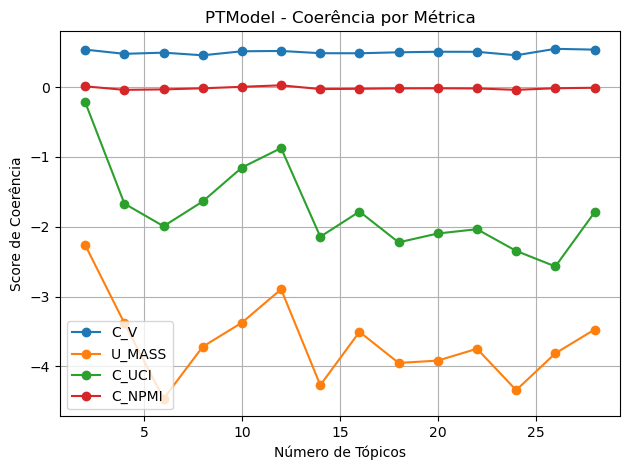


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.5374
Qtd. tópicos = 4 -> Coerência = 0.4771
Qtd. tópicos = 6 -> Coerência = 0.494
Qtd. tópicos = 8 -> Coerência = 0.4562
Qtd. tópicos = 10 -> Coerência = 0.5136
Qtd. tópicos = 12 -> Coerência = 0.5182
Qtd. tópicos = 14 -> Coerência = 0.4861
Qtd. tópicos = 16 -> Coerência = 0.485
Qtd. tópicos = 18 -> Coerência = 0.4991
Qtd. tópicos = 20 -> Coerência = 0.5068
Qtd. tópicos = 22 -> Coerência = 0.5059
Qtd. tópicos = 24 -> Coerência = 0.4566
Qtd. tópicos = 26 -> Coerência = 0.5488
Qtd. tópicos = 28 -> Coerência = 0.5373
Melhor número de tópicos segundo C_V: 26

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -2.2633
Qtd. tópicos = 4 -> Coerência = -3.3815
Qtd. tópicos = 6 -> Coerência = -4.463
Qtd. tópicos = 8 -> Coerência = -3.7174
Qtd. tópicos = 10 -> Coerência = -3.373
Qtd. tópicos = 12 -> Coerência = -2.895
Qtd. tópicos = 14 -> Coerência = -4.2685
Qtd. tópicos = 16 -> Coerência = -3.5049
Qtd. tópico

In [61]:
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = ptm_coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("PTModel - Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), ptm_coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {ptm_coherence_results[metric]['num_topics']}")


In [62]:
# Escolha da métrica
chosen_metric = 'c_npmi'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_politico_c_npmi.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.75
IRBO médio entre tópicos: 0.8838


,Tópico,Palavras,Pesos
0,0,"nao, porque, pode, ja, mim, fe, filhos, aqui, ...","[0.041497036814689636, 0.026661692187190056, 0..."
1,1,"r, 00, ifood, card, gift, paga, melhor, 11, 10...","[0.039149656891822815, 0.030450239777565002, 0..."
2,2,"dias, deus, dia, ate, feliz, compartilhe, patr...","[0.031287334859371185, 0.028668051585555077, 0..."
3,3,"deus, dia, nao, bom, amor, vida, palavra, cora...","[0.09615261107683182, 0.03872246667742729, 0.0..."
4,4,"brasil, boa, q, ta, ai, sao, pra, noite, maior...","[0.029794322326779366, 0.020525388419628143, 0..."
5,5,"voce, mundo, igreja, homem, sao, la, 1, porque...","[0.023294907063245773, 0.02018904872238636, 0...."
6,6,"deus, nao, todos, tudo, brasil, fazer, pois, a...","[0.08065818250179291, 0.053437940776348114, 0...."
7,7,"nunes, deus, rj, vamos, proprietaria, nivel, f...","[0.03818253427743912, 0.030214698985219002, 0...."
8,8,"deus, acima, gloria, todos, tudo, poderoso, or...","[0.05677945539355278, 0.0430961437523365, 0.03..."
9,9,"deus, nao, vamos, pra, vai, so, voce, povo, es...","[0.07846400141716003, 0.05079706013202667, 0.0..."


In [63]:
# Escolha da métrica
chosen_metric = 'c_v'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_politico_c_v.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.7423
IRBO médio entre tópicos: 0.946


,Tópico,Palavras,Pesos
0,0,"jesus, nome, amem, senhor, oracao, todo, pai, ...","[0.10868803411722183, 0.06642112135887146, 0.0..."
1,1,"general, outros, proximo, casa, ja, imagens, c...","[0.020568866282701492, 0.013285577297210693, 0..."
2,2,"vai, deus, ja, pais, agora, ruas, so, pessoa, ...","[0.033843111246824265, 0.028368758037686348, 0..."
3,3,"jesus, deus, nome, terra, sobre, assim, vc, mi...","[0.053561918437480927, 0.036462124437093735, 0..."
4,4,"porque, dia, deus, palavra, fe, cristo, 6, sao...","[0.040618617087602615, 0.03922867774963379, 0...."
5,5,"deus, nao, amor, so, tudo, verdade, vida, gent...","[0.1451767534017563, 0.09727941453456879, 0.03..."
6,6,"senhor, voce, paz, tambem, pois, salmos, crist...","[0.08845687657594681, 0.03555895760655403, 0.0..."
7,7,"deus, tudo, nao, certo, frente, acontecer, dar...","[0.09171074628829956, 0.0848521813750267, 0.05..."
8,8,"t, www, br, grupo, whatsapp, preso, unidade, m...","[0.027916226536035538, 0.023485783487558365, 0..."
9,9,"deus, brasil, vamos, todos, vai, acima, povo, ...","[0.13656899333000183, 0.05281725153326988, 0.0..."


In [64]:
# Escolha da métrica
chosen_metric = 'u_mass'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_politico_u_mass.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.95
IRBO médio entre tópicos: 0.7071


,Tópico,Palavras,Pesos
0,0,"deus, vamos, brasil, vai, tudo, fe, acima, est...","[0.04707934707403183, 0.015407195314764977, 0...."
1,1,"deus, nao, jesus, senhor, dia, todos, voce, no...","[0.043000105768442154, 0.03683079034090042, 0...."


In [65]:
# Escolha da métrica
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_uci'

# Obter o melhor modelo treinado
best_index = ptm_coherence_results[chosen_metric]['coherence_values'].index(
    max(ptm_coherence_results[chosen_metric]['coherence_values'])
)
best_model = ptm_coherence_results[chosen_metric]['model_list'][best_index]

# Gerar DataFrame com tópicos
def get_topics_dataframe(model, top_n=10):
    topics_data = []
    for topic_id in range(model.k):
        words_probs = model.get_topic_words(topic_id, top_n=top_n)
        topic_words = [word for word, prob in words_probs]
        topic_probs = [prob for word, prob in words_probs]
        topics_data.append({
            'Tópico': topic_id,
            'Palavras': ', '.join(topic_words),
            'Pesos': topic_probs
        })
    return pd.DataFrame(topics_data)

df_topicos = get_topics_dataframe(best_model)

df_topicos.to_csv('./resultados_pseudo/pseudo_wpp_politico_c_uci.csv', index=False)

div = topic_diversity(best_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo_score = compute_irbo_ptm(best_model)
print(f"IRBO médio entre tópicos: {round(irbo_score, 4)}")

df_topicos.head(10)

Diversidade de Tópicos: 0.95
IRBO médio entre tópicos: 0.7071


,Tópico,Palavras,Pesos
0,0,"deus, vamos, brasil, vai, tudo, fe, acima, est...","[0.04707934707403183, 0.015407195314764977, 0...."
1,1,"deus, nao, jesus, senhor, dia, todos, voce, no...","[0.043000105768442154, 0.03683079034090042, 0...."
